<a href="https://colab.research.google.com/github/pea2/hello-world/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 623 Homework Assignment 1


### Student Name:  <font color="blue"></font>Grace Smith

## Date: <font color="blue"></font>April 20, 2021

## Disclosures

*   None

## Overview

In this homework assignment, you will conduct simple linear regression using the concepts you've learned in class and from the course ISLR and HOML texts. Using a dataset of automobile data, you will first attempt to find the y-intercept of the relationship between horsepower and miles per gallong manually using a numerical process. You will then calculate the exact solution using a closed-form analytical method and compare your results. Finally, you will use the Python sklearn package to fit a linear model to the data.

This assignment includes both written and programming components.

### Written Components
Full effort answers to written components should include not only the answer to the question, but they should also include supporting information. You should provide justification or supporting information even if the question only asks for a single number or short answer.

### Programming Components
Use Python to perform any manipulations you make to provided datasets, all calculations and mathematical transformations, and to generate graphs, figures, or other support to explain how you arrived at your written answers.

### Helpful Tips

You might find these Python packages/imports helpful

``` python
import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

import seaborn as sns
```

## Simple Linear Regression

### STEP 0

Install any packages you need for your notebook. If using the Google Colab environment, you will not need to install any additional packages.

In [191]:
"""
CSCE 623 HW1. Simple Linear Regression
"""

# install packages, set configuration, as needed

'\nCSCE 623 HW1. Simple Linear Regression\n'

Import any packages you need for your notebook

In [192]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex
import seaborn as sns

#STEP_0_COMPLETE = False

### Data Analysis

In steps 1-2, you'll import and conduct an analysis of the `auto.csv` dataset.

#### STEP 1

For this assignment, you will use the auto.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv.

This dataset includes missing values, denoted as "?". You must handle these missing values. A suggested option for this dataset is to remove observations with missing data.

Store the dataset in a `pandas` `dataframe` called `df`.

In [193]:
#STEP 1

#STUDENT CODE - insert code to load auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'df'
#---------------------------------------------    
!wget https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv
#---------------------------------------------    


#show the dataset was loaded by displaying first few rows
#df.head()

#STEP_1_COMPLETE = False

--2021-04-22 20:27:45--  https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/plain]
Saving to: ‘auto.csv.2’

auto.csv.2          100%[===================>]  17.66K  --.-KB/s    in 0.001s  

2021-04-22 20:27:45 (15.5 MB/s) - ‘auto.csv.2’ saved [18079/18079]



In [194]:
df = pd.read_csv('auto.csv')
print(df.columns)
df.info()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [195]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [196]:
df = pd.read_csv('auto.csv', na_values='?')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


#### STEP 2
A common first step after importing a dataset is to explore it. Useful `pandas` `dataframe` methods include `info`, `hist`, and `corr` as well as `scatter_matrix` in `pandas.plotting`. You may also find the `pairplot` function in the `seaborn` package to be useful.

Use Python to do the following and then answer the questions below:

1. Display statistics of the dataset.
2. Display a histogram of each of the individual feature values.
3. Choose a subset of at least 5 attributes you expect to be related to one another and display a scatterplot of each of the pairings between each possible pair of these attributes.

##### Programming

              mpg   cylinders  ...        year      origin
count  392.000000  392.000000  ...  392.000000  392.000000
mean    23.445918    5.471939  ...   75.979592    1.576531
std      7.805007    1.705783  ...    3.683737    0.805518
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.000000    4.000000  ...   73.000000    1.000000
50%     22.750000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 8 columns]
5 attribute-scatter plot: mpg, displacement, horsepower, weight, cylinders
/n


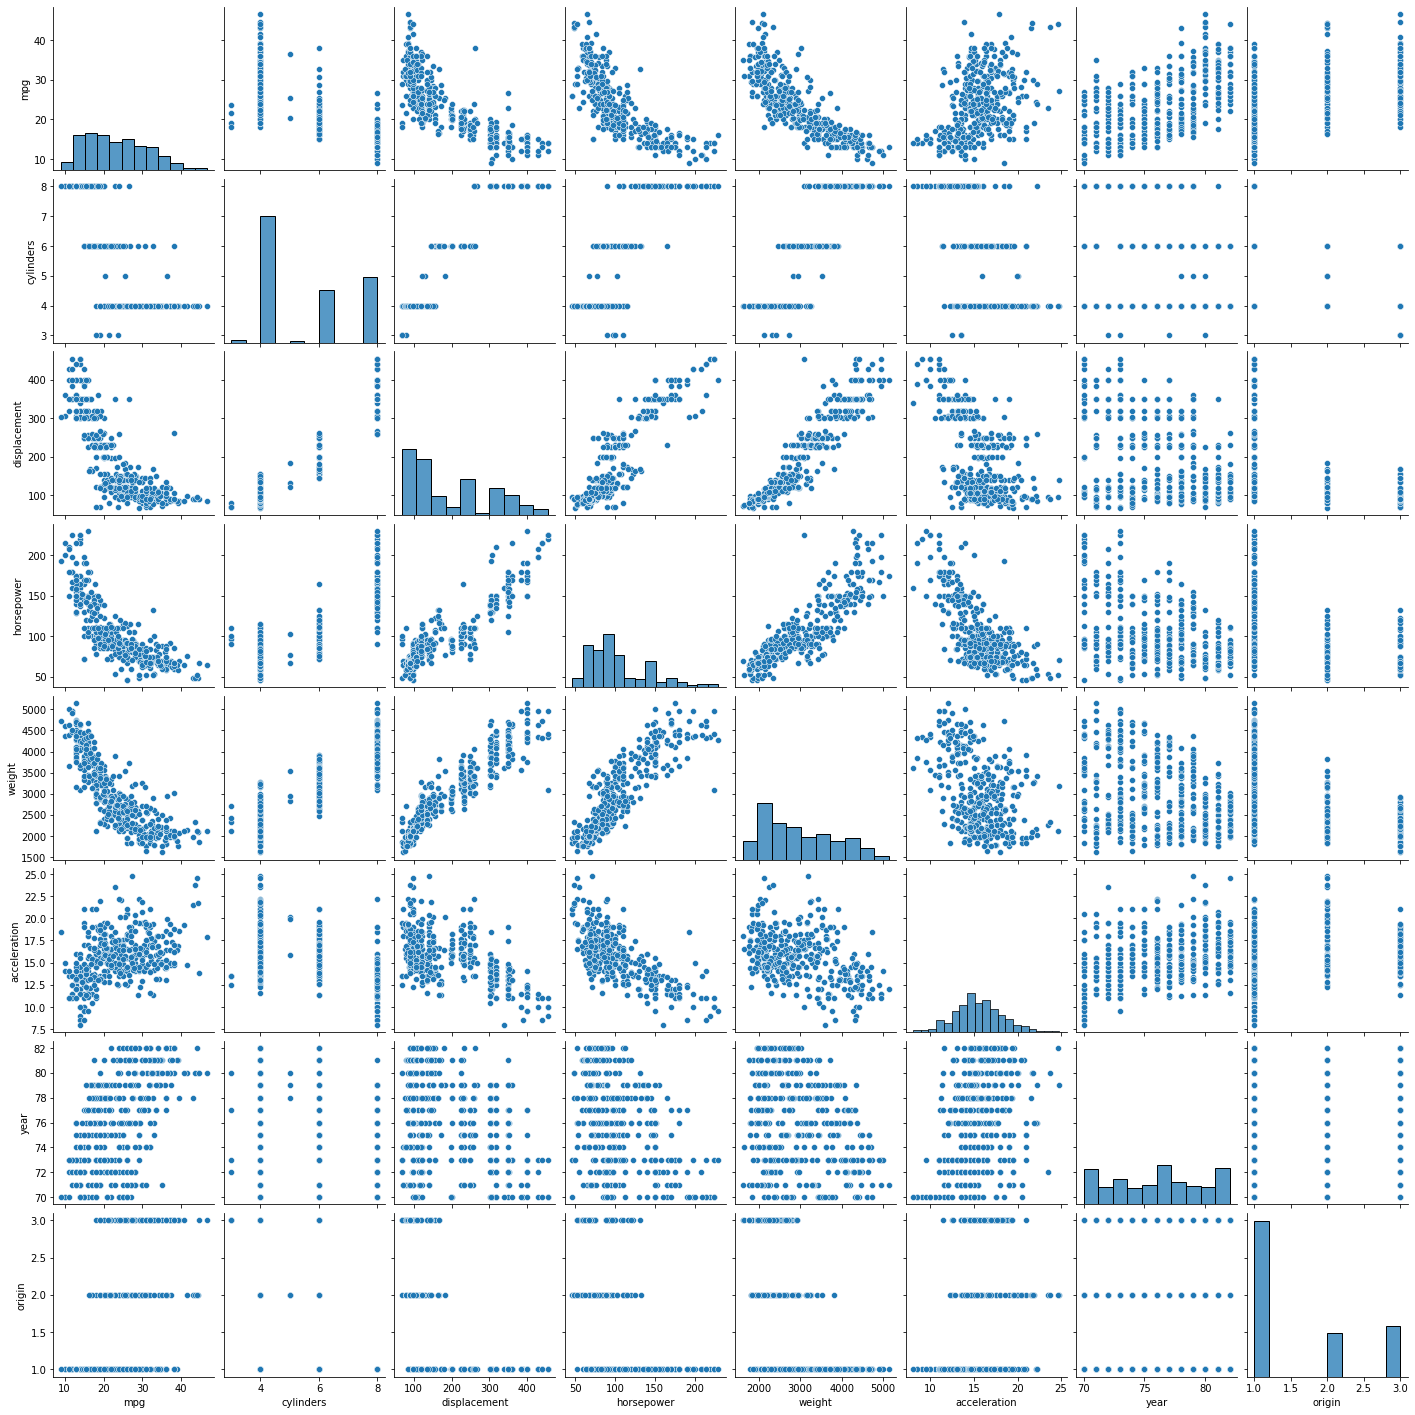

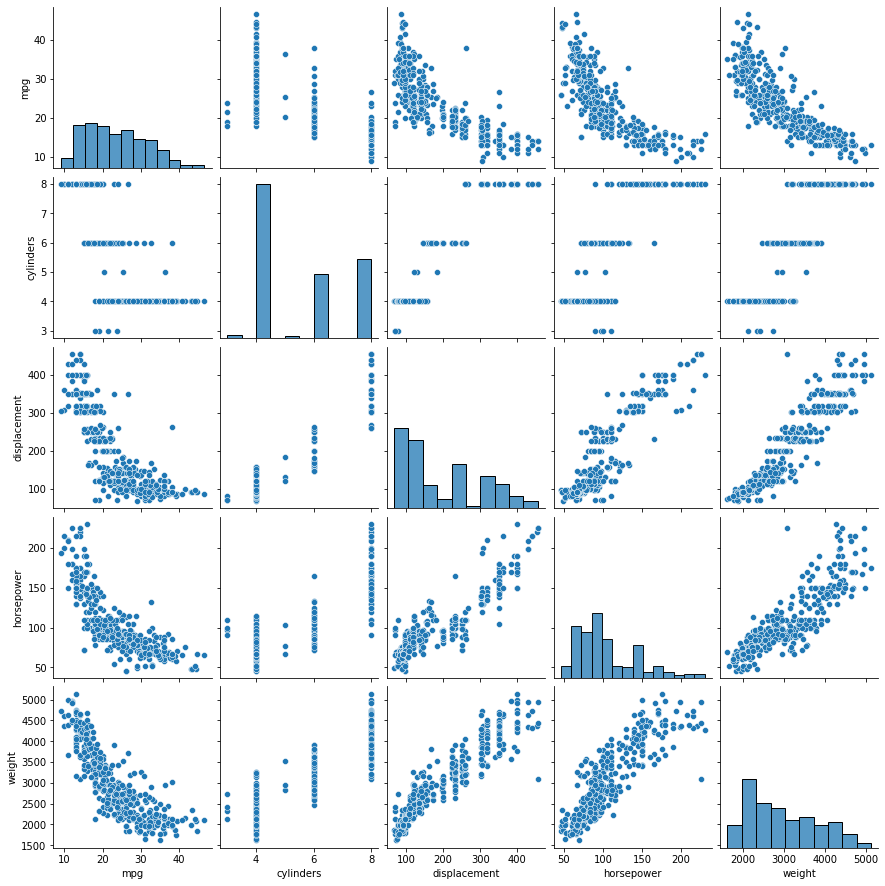

In [197]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------
print(df.describe())
sns.pairplot(df, diag_kind='hist')
print('5 attribute-scatter plot: mpg, displacement, horsepower, weight, cylinders')
df5 = df.drop(['name','origin','year','acceleration'], axis=1)
print('/n')
sns.pairplot(df5, diag_kind='hist')
#--------------------------------------------- 

##### <font color='blue'>Written Responses</font>

1. How many observations/datapoints are there?
   
   <font color='green'>Student Answer</font>

   392

2. How many features/attributes are there per observation? Describe these features in terms of type of data (feature/response and numerical/categorical)
   
   <font color='green'>Student Answer</font>

   Total of 8 features with 1 response (mpg). 

 0   mpg           response        numerical

 1   cylinders     feature         categorical

 2   displacement  feature         numerical

 3   horsepower    feature         numerical

 4   weight        feature         numerical

 5   acceleration  feature         numerical

 6   year          feature         numerical 

 7   origin        feature         categorical

 8   name          feature         categorical

3. Describe the distribution of each feature in terms of statistical descriptions (e.g., uniform, normal/Gaussian, exponential, skewed, multi-modal).

   <font color='green'>Student Answer</font>

   cylinders: chi-square/gamma

   displacement: exponential/gamma

   horsepower: lognormal/gamma

   weight: gamma

   acceleration: normal

   year: multi-modal

   origin:gamma

   (As in my STAT602 class - everything is gamma.)

4. Describe the attributes you chose for relational analysis in terms of weak- and strong-relationships, linear and non-linear relationships, and positive and negative correlations.

   <font color='green'>Student Answer</font>
   
   mpg ~ displacement: strong, nonlinear, negative correlation (as in linear relationship)

   mpg ~ horsepower: strong, nonlinear, negative correlation (as in linear relationship)

   mpg ~ weight: strong, nonlinear, negative correlation (as in linear relationship)

   displacement ~ cylinders: strong, linear, positive coorelation


In [198]:
# STEP_2_COMPLETE = False

### Find optimal $\beta_1$ value

In steps 3-7, you'll find an optimal $\beta_1$ value assuming $\beta_0$ = 40.

#### STEP 3
Make a single scatterplot of horsepower (x axis) by MPG (y axis).

Set the axes so that the origin (0,0) is included, as well as all of the datapoints. Label axes appropriately, "Horsepower" and "MPG"). 

Assuming the relationship between Horsepower and MPG is linear and $\beta_0$ (y-intercept) is fixed at 40, estimate a value of `beta1guess` (slope) from a visual inspection of the scatterplot.

Guess for $\beta_1$ = -0.150000

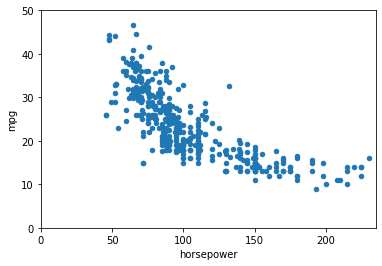

In [199]:
#STEP 3

beta0init = 40.

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on visual analysis the graph
#---------------------------------------------  
df.plot.scatter(x='horsepower', 
                y='mpg', 
                ylim = (0,50), 
                xlim = (0,235),
                xlabel = 'Horsepower',
                ylabel = 'MPG')
######## why doesn't x,y lables show up?? ##########

beta1guess = -0.15
#--------------------------------------------- 

md(r"Guess for $\beta_1$ = %f" %beta1guess)

# STEP_3_COMPLETE = False

#### STEP 4
Make a `numpy` array of possible $\beta_1$ values named `beta1bracket` that surround your `beta1guess` value. Do not hard code your values. Instead, use code. You may find the `numpy` `arange` or `linspace` functions useful.

In [200]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose
#---------------------------------------------          
beta1bracket = np.array(np.linspace(-0.5,0,num=500))
#--------------------------------------------- 

# STEP_4_COMPLETE = False

#### STEP 5

Create a function `rss1d(beta0, beta1, x, y)` to compute the sum of squared residuals (RSS) for a given $\beta_0$ and $\beta_1$ and a vector of input features `x` and target values `y`. You may assume that `x` and `y` are each single vector arrays (in this case, `pandas` Series).

Then, use this function to compute the RSS for the fixed `beta0` value (40) and for each member of the `beta1bracket` vector you created in STEP 4. Store these RSS values in a `numpy` array named `rssbeta1`.


In [201]:
#STEP 5

#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.
#---------------------------------------------
def rss1d(beta0, beta1, x, y):
  yhat = beta0 + beta1 * x
  ydiff = yhat - y
  rss = np.sum(np.square(ydiff))
  mse = rss/len(ydiff)
  rmse = np.sqrt(mse)
  return rss

beta0 = 40

#  convert a pandas dataframe to an array - method 1
# returns a pandas series with the number of rows in the original dataframe and single column. 
# You can use a series in many places as you would a numpy array. - Lt Col W.W 
x_hp = df['horsepower']
y_mpg = df['mpg']

#  convert a pandas dataframe to an array - method 2
# Will return a 1d series with length equal to the number of rows in the original dataframe.
# https://stackoverflow.com/questions/27570756/difference-between-these-array-shapes-in-numpy
# - Lt Col W.W 
# hp_x = np.squeeze(df.horsepower)
# mpg_y = np.squeeze(df.mpg)
# hp_x.shape # (392,)

rssbeta1 = []
for beta1 in beta1bracket:
  rssbeta1 = np.append(rssbeta1,rss1d(beta0, beta1,hp_x,mpg_y))

#--------------------------------------------- 

# STEP_5_COMPLETE = False

#### STEP 6

Make a new plot of $\beta_1$ values on the x axis and the RSS values you calculated in STEP 5 on the y axis (computed in step 5). Label your axes and use math fonts in your labels.

Use the `numpy` function `argmin` to find the $\beta_1$ value having the smallest RSS. Store this value in a variable named `beta1min`.

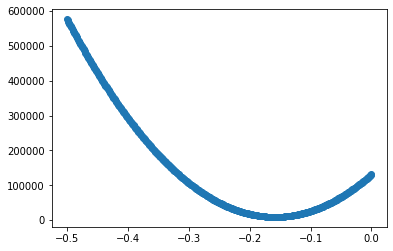

best beta1 is  -0.1583166332665331


In [202]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#find the beta1 value having the smallest RSS, and assign this value to beta1min
#---------------------------------------------          
plt.scatter(beta1bracket,rssbeta1)
plt.show()
# find the smallest rss
beta1min = np.min(rssbeta1)
# find the position of the smallest rss
position = np.argmin(rssbeta1)
# find the beta1 that associates with this smallest rss
beta1 = beta1bracket[position]
print('best beta1 is ', beta1)
#--------------------------------------------- 

# STEP_6_COMPLETE = False

#### STEP 7

<font color='blue'>Describe the RSS plot you created in STEP 6 by answering the following questions.</font>

1. What is the shape of the plot in STEP 6?  
  
  <font color='green'>Student Answer</font>
quadratic function convex
2. Using the plot, how might someone find the best value of $\beta_1$:  
  
  <font color='green'>Student Answer</font>
The lowest point of the graph is accosiated with the best beta1 value that gives the samllest RSS. 
3. Select & report value of $\beta_1$ you think will have the best fit. Note that you may need to improve your estimate in STEP 3 or add additional $\beta_1$ values in `beta1bracket` in STEP 4, then repeat steps 5 and 6. Assuming the range of values in `beta1bracket` have sufficient granularity and contain an optimal $\beta_1$ value, you may find the use of the `numpy` function `argmin` will be helpful to find the $\beta_1$ value having the smallest RSS value.

  <font color='green'>Student Answer</font>
beta1 = -.01583




In [203]:
#STEP_7_COMPLETE = False

### Evaluate $\beta_1$ value

In steps 8-12, you'll evaluate the $\beta_1$ value you discovered in steps 3-7 and compare it to the closed form solution.

#### STEP 8
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a line to the plot - the linear regression line in <font color="red">red</font> implied by the fixed $\beta_0 = 40$ and your best choice for $\beta_1$ (`beta1min`). Label your linear regression line, "1st order fitted line".

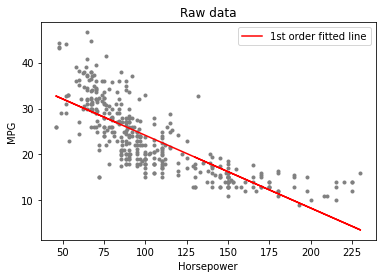

In [204]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1 
#---------------------------------------------
plt.plot(df[['horsepower']], df[['mpg']], '.', color = 'grey')
plt.title('Raw data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot(df[['horsepower']],beta0 + beta1 * df[['horsepower']], color = 'red', label = '1st order fitted line')
plt.legend()
plt.show()
#--------------------------------------------- 

STEP_8_COMPLETE = False

#### STEP 9
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [205]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  
#--------------------------------------------- 
def computeBetas(xVec, yVec):

  numerator = np.sum ( (xVec - xVec.mean()) * (yVec - yVec.mean())  )
  denominator = np.sum(np.square(xVec - xVec.mean()))
  beta1_hat = numerator/denominator
  beta0_hat = yVec.mean() - beta1_hat * xVec.mean()
  return  beta0_hat, beta1_hat 
#--------------------------------------------- 

# STEP_9_COMPLETE = False

In the `computeBetasMatrixForm` function above I used the matrix form of Equation 3.4 on page 62 of ISLR. The equation is $\mathbf{b} = \left(\mathbf{X}'\mathbf{X}\right)^{-1}\mathbf{X}'\mathbf{Y}$ and comes from Equation 5.60 on page 200 of _Applied Linear Statistical Models, 5th ed._ by Kutner, Nachtsheim, Neter, and Li. It is the book used in Math 696, Applied General Linear Models. The matrix form calculates the betas approximately 9% faster than the non-matrix form.

#### STEP 10
Compute and display the best $\beta_0$ and $\beta_1$ for the auto dataset by calling the closed-form function in step 9

In [206]:
#STEP 10
#STUDENT CODE - Compute and display beta0 and beta1 for the auto dataset by calling the closed-form function in step 9
#---------------------------------------------
beta0_hat, beta1_hat = computeBetas(df['horsepower'],df['mpg']) 
print(beta0_hat, beta1_hat)
#--------------------------------------------- 

# STEP_10_COMPLETE = False

39.93586102117047 -0.15784473335365362


#### STEP 11

How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6? 

<font color='green'>Student Answer</font>

Closed form of beta0 is 39.9 which is cery close to the given initial beta0 of 40.  Closed form of beta1 is -0.1578, comparing to method of minimizing rss for best best1 value of -0.1583, the two estimates are very close which indicated both methods are consistent in estimating the model coefficients.  

In [207]:
#STEP_11_COMPLETE = False

#### STEP 12
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a <font color="green">green</font> linear regression line formed by the closed form beta values you determined in STEP 10. Label your linear regression line, "1st order closed-form fit".

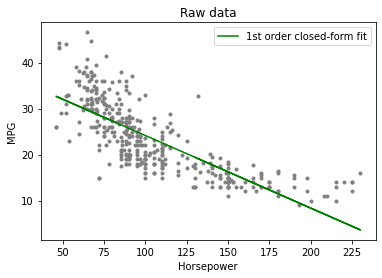

In [208]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 
#---------------------------------------------          
plt.plot(df[['horsepower']], df[['mpg']], '.', color = 'grey')
plt.title('Raw data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot(df[['horsepower']],beta0_hat + beta1_hat * df[['horsepower']], color = 'green', label = '1st order closed-form fit')
plt.legend()
plt.show()
#--------------------------------------------- 

#STEP_12_COMPLETE = False

### Fit model using `sklearn`

#### STEP 13
Use `sklearn`'s `linear_model` function to fit a linear model from horsepower to mpg. Store your model in a variable named `mpg_hp_model`. Calculate the coefficients, explained variance score, and MSE, storing the values in variables names `beta0`, `beta1`, `r2`, and `mse`. Display each of these values.

In [209]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linar model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score
#---------------------------------------------          
mpg_hp_model = linear_model.LinearRegression()
#mpg_hp_model.fit(df.horsepower,df.mpg)
#mpg_hp_model.fit(df['horsepower'],df['mpg'])
mpg_hp_model.fit(df[['horsepower']], df[['mpg']])
beta0 = mpg_hp_model.intercept_
beta1 = mpg_hp_model.coef_
r2 = mpg_hp_model.score(df[['horsepower']],df[['mpg']])
#y_pred = mpg_hp_model.predict([['horsepower']])
#mse = mean_squared_error([['mpg']], y_pred)

print('beta0: ',beta0,'\nbeta1:', beta1)
#print('r2: ',r2,'\nmse: ',mse)
#--------------------------------------------- 

#STEP_13_COMPLETE = False

beta0:  [39.93586102] 
beta1: [[-0.15784473]]


#### STEP 14
Build a new scatterplot with horsepower (x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a <font color="black"><strong>black</strong></font> linear regression line implied by the sklearn model created in STEP 13.

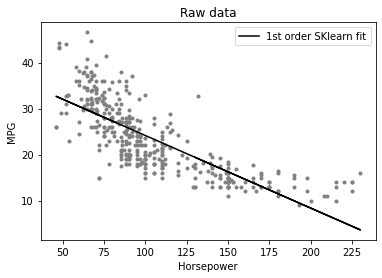

In [210]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 
#---------------------------------------------   
plt.plot(df[['horsepower']], df[['mpg']], '.', color = 'grey')
plt.title('Raw data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot(df[['horsepower']],beta0 + beta1 * df[['horsepower']], color = 'black', label = '1st order SKlearn fit')
plt.legend()
plt.show()
#--------------------------------------------- 

#STEP_14_COMPLETE = False

#### STEP 15a
Compute the residual errors in predicting mpg from horsepower.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a <font color="red">red</font> horizontal line at y=0 to indicate the zero-error position.

In [211]:
#STUDENT CODE

#---------------------------------------------  

#---------------------------------------------      

#### STEP 15b

Describe the plot - particularly the trends. Do the errors appear well-distributed, or are there trends? If there are trends, explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, and give at least one course of action you could take to make a better model.

<font color="green">Student Answer</font>



In [212]:
STEP_15_COMPLETE = False

### Optional
Optional (not required, but good practice in developing your coding skills):  build a structure containing possible values for $\beta_0$ and $\beta_1$ pairs.   Compute the RSS over all beta pairs at each cell in the matrix on the horsepower vs. MPG data.  Now build a contour and/or 3D plot of these RSS values as shown in the book Figure 3.2 on page 63 (the x and y axes are $\beta_0$ and $\beta_1$ and the z axis is RSS).   Write code to determine the beta pair with the minimum RSS.  Report the minimum value cost. On your contour/3D plot, add a point at the location of the $\beta_0$, $\beta_1$ coordinates which minimize the RSS.

In [213]:
#STUDENT CODE

#---------------------------------------------

#---------------------------------------------